<a href="https://colab.research.google.com/github/dorian-goueytes/M1_SCE_TT_signal_S2/blob/main/TD1_Fondamentaux_du_traitement_du_signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction :

L'objectif de ce TD est de mettre en pratique les bases de traitement du signal vues durant les CM1 et CM2.

## Structure et objectif :

Chaque section est constituée de un ou plusieurs exercices dont l'objectif est d'implémenter vous-même des concepts issus du cours (Ondes pures, ondes composites, échantillonnage, Transformée de Fourier Discrète...).

Vous êtes encouragé.es à tenter de développer votre propre réponse aux consignes de chaques exercices. Vous pouvez solliciter l'aide du professeur pour cela.

Si l'exercice vous parait trop complexe vous pouvez regarder la solution proposée, et essayer de comprendre et de reproduire son fonctionnement.

Validez avec le professeur votre solution/compréhension de la solution avant de passer à l'exercice suivant.

## Dos and Don'ts :


*   Vous êtes encouragé.es à travailler en binôme/trinôme et à échanger entre vous
*   Vous êtes encouragé.es à utiliser vos notes de cours.
*   Vous pouvez faire des recherches web et utiliser Stack Overflow pour alimenter vos réponses.
*   **ChatGPT ou tout autre LLM sont strictement interdit**

L'objectif du TD est de vous mettre en position de réfléchir activement à des questions de traitement du signal **ET** de développer votre autonomie en Python. Chaque exercice peut aisément être résolu par ChatGPT, mais votre apprentissage en sera diminué.

Les solutions aux exercices sont fournies dans le document, et vous êtes **très fortement encouragé.es à solliciter le professeur** en cas de blocage/difficulté à comprendre un exercice.

# Importation des bibliothèques Python nécessaires

Il existe de nombreuses bibliothèques Python dédiés au traitement du signal. L'objectif aujourd'hui d'implémenter nous même des algorithmes de traitement du signal, et nous n'utiliserons donc pas ces bibliothèques, sauf à des fins de vérification

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Création et échantillonage de signaux sinusoïdaux simples

#### L'objectif de ce segment est de créer et de manipuler des signaux périodiques simples (ondes sinusoïdales pures)

## Créer une onde pure de fréquence, amplitude et phase données

### Exercice 1 : Construire une sinusoïde

En utilisant la formule trigonométrique du cours, écrire une segment de code générant une sinusoïde pure de fréquence 8 Hz et d'amplitude 1.2.

Créez un graph réprésentant cette onde sur une période de 1s

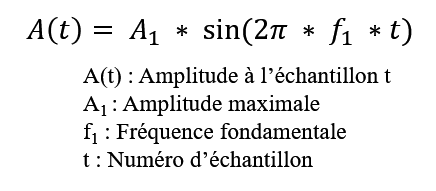

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:
## Paramètres requis
amp = 1.2 # amplitude requise par l'énoncé
freq = 8 # Fréquence requise par l'énoncé
duration = 1  # Durée requise par l'énoncé

fe = 1000  #nombre d'échantillons par seconde
time = np.linspace(0, duration, int(fe*duration))#temps discret de chaque échantillon

## Formulation explicite basé sur la fonction trigonométrique
sinu = []
for t in time:
  sinu.append(amp * math.sin(2 * math.pi * freq * t)) # basé sur la formule : A(t) = Amp * sin(2pi*Freq*t)

## La boucle for ci-dessus peut-être écrit d'une manière plus compacte (méthode par "list comprehension"):
sinu = [amp * math.sin(2 * math.pi * freq * t) for t in time]

# Bonus : Formulation alternative basée sur une notation en nombre complexe (cf. Transformée de Fourier Discrète)
sinu_comp = [amp * np.imag(np.exp(1j * (2 * np.pi * freq * t))) for t in time]

## Création d'une visualisation
plt.figure() # Création d'une figure vide
plt.plot(time, sinu, label = 'Formulation Trigo.') # Plot notre variable sinu en fonction de la variable time
plt.plot(time, sinu_comp, label = 'Formulation Com.', linestyle = '--')
plt.xlabel ("Temps (s)")
plt.ylabel("Amplitude")
plt.title(f"Sine Wave (Freq.: {freq} Hz, Amp.: {amp}, Duration: {duration} sec)")
plt.grid()
plt.legend()
plt.show() # Montre la figure

### Exercice 2 : Créer une fonction pour construire une sinusoïde arbitraire

Ecrivez une fonction ayant pour argument une fréquence, une amplitude et une durée et retournant un graph de la sinusoïde correspondante.

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:
def plot_sine(freq = 1, amp = 1, duration = 1, fe = 1000):

  # Axe temporel
  time = np.linspace(0, duration, int(fe*duration))#temps discret de chaque échantillon

  # Compute a sine wave based on trigo formulation
  sinu = [amp * math.sin(2 * math.pi * freq * t) for t in time]

  ## Création d'une visualisation
  plt.figure()
  plt.plot(time, sinu)
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.title(f"Sine Wave (Freq.: {freq} Hz, Amp.: {amp}, Duration: {duration} sec)")
  plt.grid()
  plt.show()

# Using function with default arguments
plot_sine()

# Using function with arbitrary arguments
plot_sine(2.3, 5, 2.5, 1000)

## Manipuler deux ondes pures, simuler différentes fréquences d'échantillonage

### Exercice 3 : Manipulation de la phase

Créer deux sinusoïdes ayant les même propriétés (fréquence et amplitude identiques) mais des phases différentes

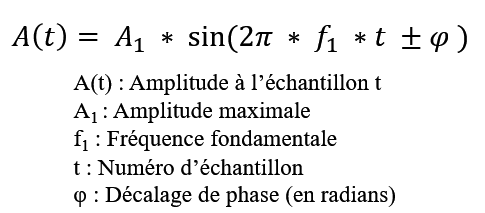

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:
## Paramètres requis
amp = 2 # amplitude requise par l'énoncé
freq = 4 # Fréquence requise par l'énoncé
duration = 1  # Durée requise par l'énoncé

fe = 1000  #nombre d'échantillons par seconde
time = np.linspace(0, duration, int(fe*duration))#temps discret de chaque échantillon
phase_shift_deg = 90  # Phase shift in degrees
phase_shift_rad = np.deg2rad(phase_shift_deg)  # Convert degrees to radians


# Compute sine waves using trigonometric formulation
sine_wave_1 = amp * np.sin(2 * np.pi * freq * time)  # No phase shift
sine_wave_2 = amp * np.sin(2 * np.pi * freq * time + phase_shift_rad)  # With phase shift

# Plot
plt.figure()
plt.plot(time, sine_wave_1, label="Sine Wave (0 Phase)")
plt.plot(time, sine_wave_2, linestyle="dashed", label=f"Sine Wave ({phase_shift_deg:.2f} Phase Shift (Degree)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Two Identical Sine Waves with {phase_shift_deg:.2f} Phase Shift (Degree)")
plt.legend()
plt.grid()

plt.show()


#### Question : Quelle valeur de phase shift (en degrés) faudrait-il utiliser pour que nos deux sinusoïdes soient en antiphase?

### Exercice 4 : Sous-échantillonnage

Jusqu'ici nous avons par défaut supposé que notre fréquence d'échantillonnage était de 1000 Hz (notre variable "sinu" contenait 1000 points pour chaques secondes dans la valeur "duration)

En vous basant sur les exercices précédants, créez et faites un graph d'une sinusoïde échantillonnée à 200 Hz.

Dans un second temps, ré-échantillonnez cette sinusoïde à 100 Hz puis 40 Hz

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:
## Paramètres requis
amp = 1.2 # amplitude requise par l'énoncé
freq = 8 # Fréquence requise par l'énoncé
duration = 1  # Durée requise par l'énoncé

fe = 200  #nombre d'échantillons par seconde
time = np.linspace(0, duration, int(fe*duration))#temps discret de chaque échantillon


## La boucle for ci-dessus peut-être écrit d'une manière plus compacte (méthode par "list comprehension"):
sinu = [amp * math.sin(2 * math.pi * freq * t) for t in time] # Signal original


## Création d'une visualisation
fig, (ax1, ax2, ax3) = plt.subplots(3,1)#, sharex=True) # Création d'une figure vide avec 3 subplots

## Graph du signal original
ax1.plot(time, sinu, marker = 'o', label="Original Signal") # Plot notre variable sinu en fonction de la variable time
ax1.set_ylabel("Amplitude")
ax1.legend()
ax1.grid()

## Ré-échantillonnage à 100 Hz
rescale = 100
factor = fe / rescale  # Compute scaling factor
resampled_data = []
resample_index = np.arange(0, fe,factor)
for i in resample_index:
    resampled_data.append(sinu[int(i)])
time = np.linspace(0, duration, int(rescale*duration))
ax2.plot(time, resampled_data, marker = 'o', label=f"Resampled at {rescale} Hz")
ax2.set_ylabel("Amplitude")
ax2.legend()
ax2.grid()


## Ré-échantillonnage à 70 Hz
rescale = 40
factor = fe / rescale  # Compute scaling factor
resampled_data = []
resample_index = np.arange(0, fe,factor)
for i in resample_index:
    resampled_data.append(sinu[int(i)])
time = np.linspace(0, duration, int(rescale*duration))
ax3.plot(time, resampled_data, marker = 'o', label=f"Resampled at {rescale} Hz")
ax3.set_ylabel("Amplitude")
ax3.legend()
ax3.grid()
ax3.set_xlabel ("Temps (s)")
plt.suptitle(f"Sine Wave (Freq.: {freq} Hz, Amp.: {amp}, Duration: {duration} sec)")

plt.tight_layout()
plt.show()

# Création et échantillonages de signaux sinusoïdaux complexes

L'objectif de ce segment est de comprendre comment des signaux complexes peuvent être le résultats de la somme ou de la concatenation d'un certain nombre de sinusoïdes pures

## Création de signaux composites

### Exercice 5 : Créer un signal composite

En vous basant sur les exercices précédents, construire dans un premier temps deux sinusoïdes pure de fréquence 10 et 2 Hz, d'amplitude 2 et 10 sans décalage de phase.

Ensuite combinez ces deux sinusoïdes pures pour créer un signal composite

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:
def create_sine(freq = 1, amp = 1, duration = 1, fe = 1000):

  # Axe temporel
  time = np.linspace(0, duration, int(fe*duration))#temps discret de chaque échantillon

  return np.array([amp * math.sin(2 * math.pi * freq * t) for t in time])

duration = 1
fe = 1000
sin1 = create_sine(10,2, duration, fe)
sin2 = create_sine(2,10, duration, fe)
sin_composite = sin1+sin2

time = np.linspace(0,duration, fe)
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)
ax1.plot(time, sin1, label = 'Sine at 10Hz, amp. 2')
ax1.plot(time, sin2, label = 'Sine at 2Hz, amp. 10')
ax1.grid()
ax1.set_ylabel("Amplitude")
ax1.legend()

ax2.plot(time, sin1, label = 'Sine at 10Hz, amp. 2', alpha = 0.3)
ax2.plot(time, sin2, label = 'Sine at 3Hz, amp. 10', alpha = 0.3)
ax2.plot(time, sin_composite, label = 'Signal composite')
ax2.grid()
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Temps (s)")
ax2.legend()

plt.tight_layout()
plt.show()

#### Question : Selon vous quelle est la fréquence dominante dans le signal composite? Pourquoi?

In [ ]:
# Ecrivez votre réponse ici

### Exercice 6 : Vérifier la stationnarité d'un signal composite

Le signal composite de l'exercice précédent est-il stationnaire? En simulant ce même signal sur une durée de 10 secondes, prouvez sa stationnarité au cours du temps

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:
## Dans un premier temps nous reconstruisons le signal composite sur une durée de 10 secondes
def create_sine(freq = 1, amp = 1, duration = 1, fe = 1000):

  # Axe temporel
  time = np.linspace(0, duration, int(fe*duration))#temps discret de chaque échantillon

  return np.array([amp * math.sin(2 * math.pi * freq * t) for t in time])

duration = 10
fe = 1000
sin1 = create_sine(10,2, duration, fe)
sin2 = create_sine(2,10, duration, fe)
sin_composite = sin1+sin2

## Stationnarité : Un signal est considéré stationnaire si sa moyenne et son écart type sont constantes au cours du temps
## Nous pouvons donc vérifier la stationnarité du signal en calculant à chaque seconde la moyenne et la écart type
interval = np.arange(0,fe*duration, fe)
mean_over_time =  []
std_over_time = []
for period in range(0, duration):
  index = [period*fe, (period+1)*fe]
  mean_over_time.append(np.mean(sin_composite[index[0]:index[1]]))
  std_over_time.append(np.std((sin_composite[index[0]:index[1]])))


plt.figure()
time = np.linspace(0,duration, fe*duration)
plt.plot(time, sin_composite, alpha = 0.5)
for t in range(0,duration):
  plt.scatter(t+0.5, mean_over_time[t], marker = 's', s = 70, color = 'darkred')
  plt.errorbar(t+0.5, mean_over_time[t], yerr=std_over_time[t], color = 'darkred')
  plt.axvline(t, color = 'darkred', linestyle = '--', alpha = 0.3)
  plt.axvline(t+1, color = 'darkred', linestyle = '--', alpha = 0.3)
plt.grid()
plt.ylabel("Amplitude")
plt.xlabel("Temps (s)")
plt.legend()
plt.tight_layout()
plt.show()

## Création de signaux non-stationnaires

### Exercice 7 : Créer un signal non-stationnaire

en vous basant sur l'exercice précédent, créez un signal non-stationnaire de deux secondes, dont la première seconde correspond à une sinusoïde de fréquence 10, amplitude 2 et la deuxième seconde à une sinusoïde de fréquence 2 et d'amplitude 10

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:
def create_sine(freq = 1, amp = 1, duration = 1, fe = 1000):

  # Axe temporel
  time = np.linspace(0, duration, int(fe*duration))#temps discret de chaque échantillon

  return np.array([amp * math.sin(2 * math.pi * freq * t) for t in time])

duration = 1
fe = 1000
sin1 = create_sine(10,2, duration, fe)
sin2 = create_sine(2,10, duration, fe)
sin_nstat = np.concatenate((sin1, sin2))

fig, (ax1, ax2) = plt.subplots(2,1)
time = np.linspace(0,duration, fe*duration)
ax1.plot(time, sin1)
ax1.plot(time, sin2)
ax1.grid()
ax1.set_xlabel("Temps (s)")
ax1.set_ylabel("Amplitude")


time2 = np.linspace(0,duration*2, fe*duration*2)
ax2.plot(time2, sin_nstat)
ax2.grid()
ax2.set_xlabel("Temps (s)")
ax2.set_ylabel("Amplitude")

plt.tight_layout()
plt.show()


### Exercice 8 : Evaluer la non-stationnarité d'un signal

De manière similaire à l'exercice 6, prolongez notre signal non-stationnaire à 10 secondes (5s 10Hz 2 amp, 5s 2Hz 10 amp) et évaluez sa stationnarité au cours du temps

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:
def create_sine(freq = 1, amp = 1, duration = 1, fe = 1000):

  # Axe temporel
  time = np.linspace(0, duration, int(fe*duration))#temps discret de chaque échantillon

  return np.array([amp * math.sin(2 * math.pi * freq * t) for t in time])

duration = 5
fe = 1000
sin1 = create_sine(10,2, duration, fe)
sin2 = create_sine(2,10, duration, fe)
sin_nstat = np.concatenate((sin1, sin2))

## Stationnarité : Un signal est considéré stationnaire si sa moyenne et son écart type sont constantes au cours du temps
## Nous pouvons donc vérifier la stationnarité du signal en calculant à chaque seconde la moyenne et la écart type
interval = np.arange(0,fe*duration, fe)
mean_over_time =  []
std_over_time = []
for period in range(0, duration*2):
  index = [period*fe, (period+1)*fe]
  mean_over_time.append(np.mean(sin_nstat[index[0]:index[1]]))
  std_over_time.append(np.std((sin_nstat[index[0]:index[1]])))


plt.figure()
time = np.linspace(0,duration*2, fe*duration*2)
plt.plot(time, sin_nstat, alpha = 0.5)
for t in range(0,duration*2):
  plt.scatter(t+0.5, mean_over_time[t], marker = 's', s = 70, color = 'darkred')
  plt.errorbar(t+0.5, mean_over_time[t], yerr=std_over_time[t], color = 'darkred')
  plt.axvline(t, color = 'darkred', linestyle = '--', alpha = 0.3)
  plt.axvline(t+1, color = 'darkred', linestyle = '--', alpha = 0.3)
plt.grid()
plt.ylabel("Amplitude")
plt.xlabel("Temps (s)")
plt.tight_layout()
plt.show()

# Transformée de Fourier discrète

## Création d'un signal complexe

In [ ]:
# Parameters
fe = 1000  # samples per second
duration = 1       # seconds
time = np.linspace(0,duration, fe)

amp1 = 3
freq1 = 10
amp2 = 0.3
freq2 = 3
amp3 = 1
freq3 = 25

sin1 = [amp1 * math.sin(2 * math.pi * freq1 * t) for t in time]
sin2 = [amp2 * math.sin(2 * math.pi * freq2 * t) for t in time]
sin3 = [amp3 * math.sin(2 * math.pi * freq3 * t) for t in time]
sin_comp = np.array(sin1)+np.array(sin2)+np.array(sin3)


plt.figure()
plt.plot(time, sin1, alpha = 0.3)
plt.plot(time, sin2, alpha = 0.3)
plt.plot(time, sin3, alpha = 0.3)
plt.plot(time,sin_comp )
plt.xlabel("Temps (s)")
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### Exercice 9 : Décomposition du signal via Transformée de Fourier Discrète (TFD)

En vous basant sur la formule données dans le cours (voir ci-dessous) et sur vos propres recherches au besoin, implémentez une transformée de fourier discrète et appliquez là au signal complexe généré ci-dessus

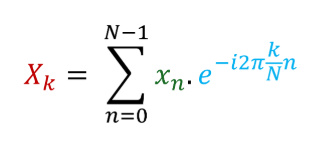


In [ ]:
# Ecrivez votre code ici (indice : N  = K = nombre d'échantillon de notre signal complexe)

#### Solution

In [ ]:

def dft(signal):
  N = len(signal)
  temp_TFD = []
  for k in range(N):
      sum = 0
      for n in range(N):
          sum+= signal[n]* np.exp(-1j * (2 * np.pi * k/N * n))
      temp_TFD.append(sum)

  plt.figure()
  plt.plot(temp_TFD)
  plt.show()
  TFD = np.array([abs(temp_TFD[k]) / (N/2) for k in range(N)])  # Normalization step
  return TFD[0:int(N/2)]

TFD = dft(sin_comp)
plt.plot(TFD, marker = 'o')
plt.xlim(0,30)
plt.hlines(amp1, 0,  freq1, color = 'k', linestyle = '--')
plt.vlines(freq1, 0,  amp1, color = 'k', linestyle = '--')

plt.hlines(amp2, 0,  freq2, color = 'k', linestyle = '--')
plt.vlines(freq2, 0,  amp2, color = 'k', linestyle = '--')

plt.hlines(amp3, 0,  freq3, color = 'k', linestyle = '--')
plt.vlines(freq3, 0,  amp3, color = 'k', linestyle = '--')
plt.grid()
plt.show()

### Exercice 10 : Reconstruire un signal depuis sa TFD

A partir de la transformée de Fourier discrète obtenue à l'exercice précédent, extrayez les composantes pures de notre signal complexe, et reconstruisez le signal original à partir de ces informations

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:

fig,(ax1, ax2, ax3) = plt.subplots(3,1, figsize = (12,8))
ax1.plot(time,sin_comp)
ax1.plot(time, sin1, alpha = 0.3)
ax1.plot(time,sin2, alpha = 0.3)
ax1.plot(time, sin3, alpha = 0.3)
ax1.grid()
ax1.set_title("Original signal")


## Extraction des composantes du signal original à partir de la transformée de Fourier
freq_content = np.where(TFD>0.01)[0] #Le contenu fréquentiel du signal original correspond à la partie non-nulle de la TFD
amp_content = TFD[freq_content] #Les ordonnées de la TFD correspondent à l'amplitude de chaque fréquence dans le signal original

print("Liste des fréquences détectées : ", freq_content)
print("Liste des amplitudes correspondantes : ", amp_content)

recon_signal = np.zeros(len(sin_comp))# On initie un signal reconstruit de valeur constante 0 qui à le même nombre d'échantillon que le signal original
for spec in range(0, len(freq_content)): #Pour chaque fréquence détectée par la TFD...
  ax2.plot(time, [amp_content[spec] * math.sin(2 * math.pi * freq_content[spec] * t) for t in time], alpha = 0.3) #..on plotte une sinusoïde pure correspondant à ces caractéristiques...
  recon_signal = recon_signal+ [amp_content[spec] * math.sin(2 * math.pi * freq_content[spec] * t) for t in time] #...et on ajoute cette sinusoïde à notre signal reconstruit

ax2.plot(time, recon_signal)
ax2.set_title("Reconstructed signal")
ax2.grid()

ax3.plot(time, sin_comp)
ax3.plot(time, recon_signal)
ax3.plot(time, sin_comp-recon_signal, label = 'Difference between original and recon signal')
ax3.set_title('Original and reconstructed signal overlayed')
ax3.grid()
ax3.legend()
plt.tight_layout()
plt.show()

#### Question : Observez-vous une différence entre le signal original et le signal reconstruit? Si oui, expliquez la cause de ce phénomène

In [ ]:
# Ecrivez votre réponse ici